In [1]:
library(wooldridge)
library(stargazer)
library(knitr)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [18]:
pacman::p_load(wooldridge,stargazer,broom,tidyverse,ggplot2,
               dplyr,tidyr,moderndive,jtools,sjPlot,dotwhisker)

# Example 4.1 Hourly Wage Equation

In [2]:
glimpse(wage1)

Observations: 526
Variables: 24
$ wage     <dbl> 3.10, 3.24, 3.00, 6.00, 5.30, 8.75, 11.25, 5.00, 3.60, 18.18…
$ educ     <int> 11, 12, 11, 8, 12, 16, 18, 12, 12, 17, 16, 13, 12, 12, 12, 1…
$ exper    <int> 2, 22, 2, 44, 7, 9, 15, 5, 26, 22, 8, 3, 15, 18, 31, 14, 10,…
$ tenure   <int> 0, 2, 0, 28, 2, 8, 7, 3, 4, 21, 2, 0, 0, 3, 15, 0, 0, 10, 0,…
$ nonwhite <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ female   <int> 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, …
$ married  <int> 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, …
$ numdep   <int> 2, 3, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 3, 0, …
$ smsa     <int> 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ northcen <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ south    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ west     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ construc <int> 0, 

In [10]:
?wage1

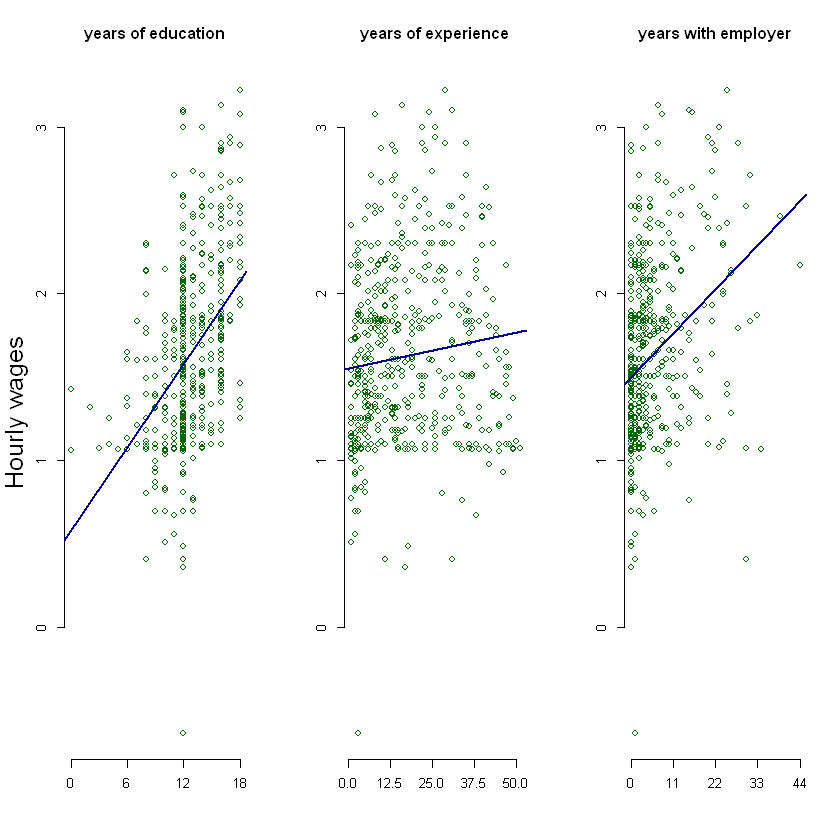

In [2]:
par(mfrow=c(1,3))

plot(y = wage1$lwage, x = wage1$educ, col="darkgreen", xaxt="n", frame = FALSE, main = "years of education", xlab = "", ylab = "")
mtext(side=2, line=2.5, "Hourly wages", cex=1.25)
axis(side = 1, at = c(0,6,12,18))
abline(lm(lwage ~ educ, data=wage1), col = "darkblue", lwd=2)

plot(y = wage1$lwage, x = wage1$exper, col="darkgreen", xaxt="n", frame = FALSE, main = "years of experience", xlab = "", ylab = "")
axis(side = 1, at = c(0,12.5,25,37.5,50))
abline(lm(lwage ~ exper, data=wage1), col = "darkblue", lwd=2)

plot(y = wage1$lwage, x = wage1$tenure, col="darkgreen", xaxt="n", frame = FALSE, main = "years with employer", xlab = "", ylab = "")
axis(side = 1, at = c(0,11,22,33,44))
abline(lm(lwage ~ tenure, data=wage1), col = "darkblue", lwd=2)

Estimate the model regressing educ, exper, and tenure against log(wage).

$$\widehat{log(wage)} = \beta_0 + \beta_1educ + \beta_3exper + \beta_4tenure$$

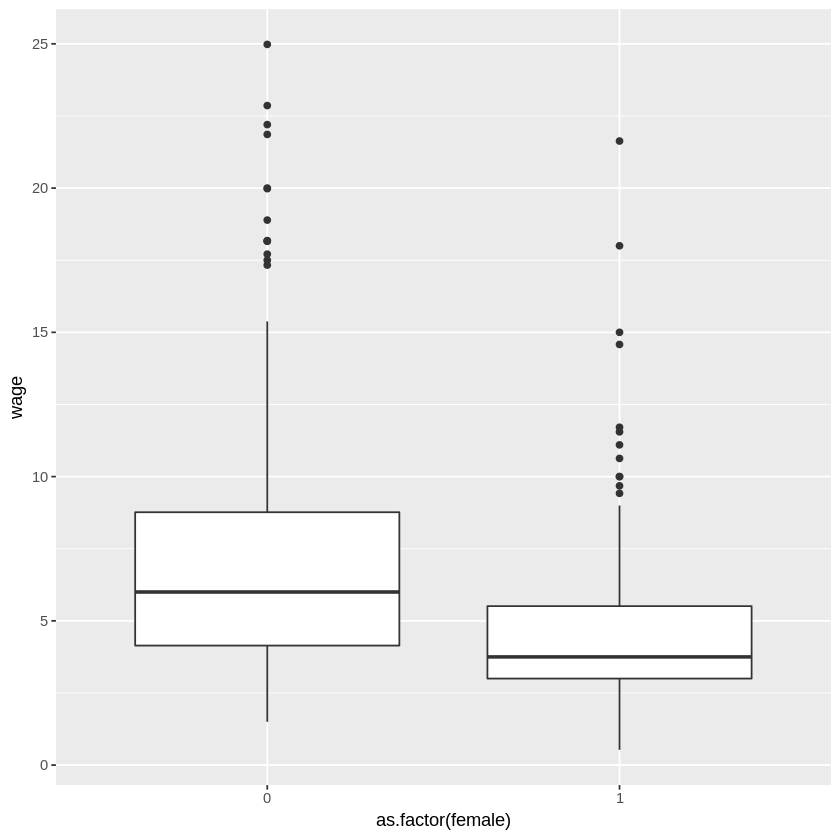

In [3]:
wage1 %>% ggplot(mapping = aes(x = as.factor(female), y =wage))+geom_boxplot()#+facet_wrap(facets = ~as.factor(female))


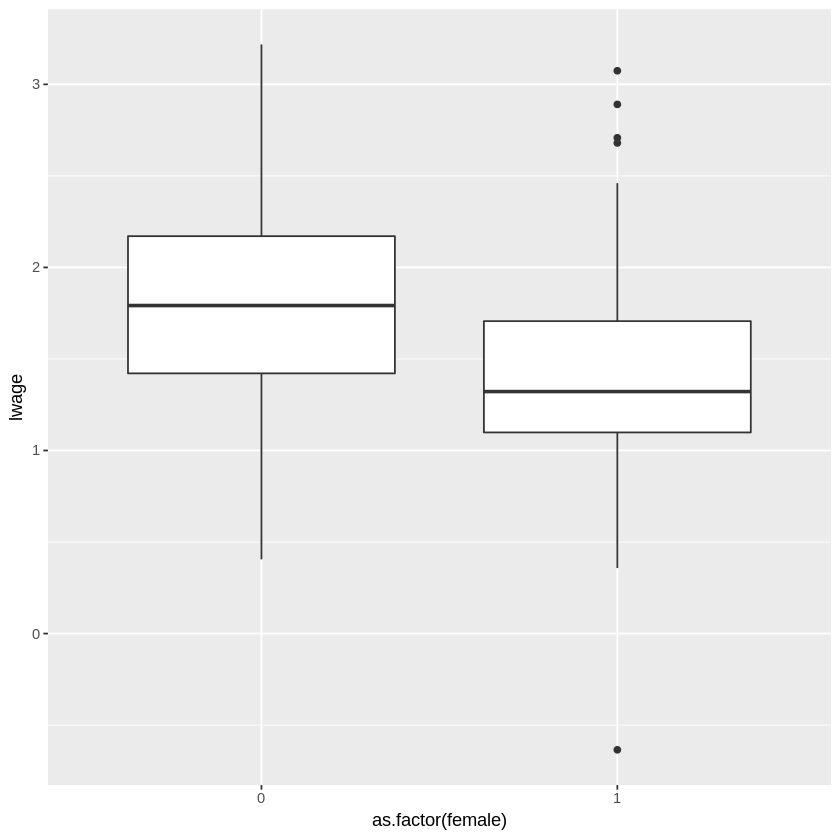

In [4]:
wage1 %>% ggplot(mapping = aes(x = as.factor(female), y =lwage))+geom_boxplot()#+facet_wrap(facets = ~as.factor(female))


In [15]:
hourly_wage_model <- lm(lwage ~  1+female  +  exper+ I(exper^2) + tenure, data = wage1)

In [24]:
coefficients(hourly_wage_model)
kable(coefficients(hourly_wage_model), digits=4, col.names = "Coefficients", align = 'l')

(Intercept)        female         exper    I(exper^2)        tenure 
 1.4792889647 -0.3314668434  0.0354703851 -0.0008410766  0.0190756838



|            |Coefficients |
|:-----------|:------------|
|(Intercept) |1.4793       |
|female      |-0.3315      |
|exper       |0.0355       |
|I(exper^2)  |-0.0008      |
|tenure      |0.0191       |

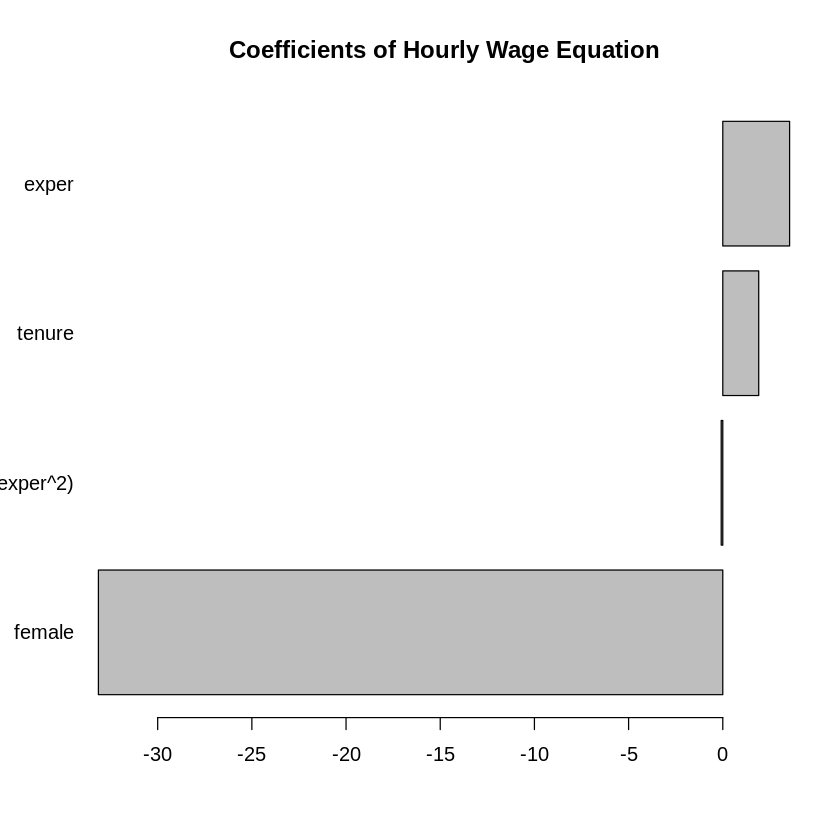

In [25]:
barplot(sort(100*hourly_wage_model$coefficients[-1]), horiz=TRUE, las=1,
        ylab = " ", main = "Coefficients of Hourly Wage Equation")

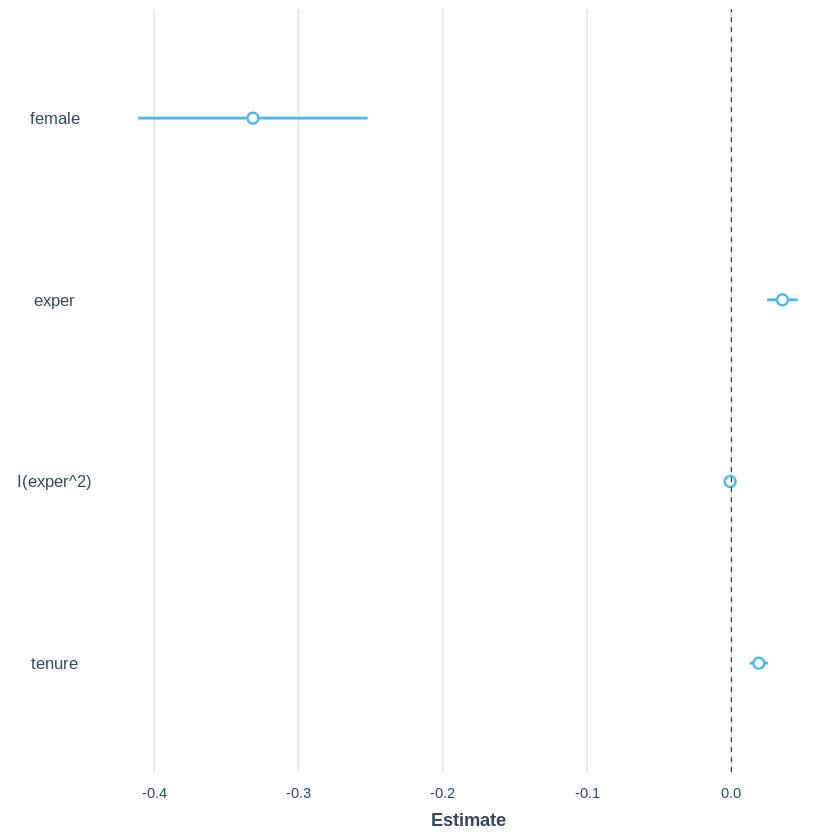

In [20]:
plot_summs(hourly_wage_model)

In [31]:
anova(hourly_wage_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
female,1,20.712000,20.7120004,100.912619,8.012062e-22
exper,1,1.364198,1.3641976,6.646618,1.020791e-02
I(exper^2),1,12.192447,12.1924473,59.403813,6.542811e-14
tenure,1,7.127481,7.1274811,34.726380,6.818253e-09
Residuals,521,106.933625,0.2052469,NA,NA


In [36]:
anova(hourly_wage_model) %>%  slice(1:4)   %>% colSums 

Df       Sum Sq      Mean Sq      F value       Pr(>F) 
  4.00000000  41.39612647  41.39612647 201.68943028   0.01020791

In [37]:
41.396/148.323

[1] 0.2790936

In [33]:
1- 106.933625/148.329751409647

[1] 0.2790817

In [26]:
summary(hourly_wage_model)
# stargazer(type = "html", hourly_wage_model,  single.row = TRUE, header = FALSE, digits=5)


Call:
lm(formula = lwage ~ 1 + female + exper + I(exper^2) + tenure, 
    data = wage1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93740 -0.29418 -0.04954  0.27749  1.54372 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.4792890  0.0494707  29.902  < 2e-16 ***
female      -0.3314668  0.0404462  -8.195 1.95e-15 ***
exper        0.0354704  0.0054191   6.545 1.42e-10 ***
I(exper^2)  -0.0008411  0.0001165  -7.220 1.85e-12 ***
tenure       0.0190757  0.0032371   5.893 6.82e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.453 on 521 degrees of freedom
Multiple R-squared:  0.2791,	Adjusted R-squared:  0.2735 
F-statistic: 50.42 on 4 and 521 DF,  p-value: < 2.2e-16


In [27]:
stargazer(type = "text", hourly_wage_model,  single.row = TRUE, header = FALSE, digits=5)


                        Dependent variable:    
                    ---------------------------
                               lwage           
-----------------------------------------------
female                 -0.33147*** (0.04045)   
exper                  0.03547*** (0.00542)    
I(exper2)              -0.00084*** (0.00012)   
tenure                 0.01908*** (0.00324)    
Constant               1.47929*** (0.04947)    
-----------------------------------------------
Observations                    526            
R2                            0.27908          
Adjusted R2                   0.27355          
Residual Std. Error     0.45304 (df = 521)     
F Statistic          50.42236*** (df = 4; 521) 
Note:               *p<0.1; **p<0.05; ***p<0.01


In [28]:
summary(hourly_wage_model)$coefficients
kable(summary(hourly_wage_model)$coefficients, align="l", digits=5)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.4792889647,0.0494707462,29.902297,3.934753e-115
female,-0.3314668434,0.0404461759,-8.195258,1.952086e-15
exper,0.0354703851,0.0054190854,6.545456,1.421999e-10
I(exper^2),-0.0008410766,0.0001164882,-7.220270,1.848325e-12
tenure,0.0190756838,0.0032370571,5.892909,6.818253e-09




|            |Estimate |Std. Error |t value  |Pr(>&#124;t&#124;) |
|:-----------|:--------|:----------|:--------|:------------------|
|(Intercept) |1.47929  |0.04947    |29.90230 |0                  |
|female      |-0.33147 |0.04045    |-8.19526 |0                  |
|exper       |0.03547  |0.00542    |6.54546  |0                  |
|I(exper^2)  |-0.00084 |0.00012    |-7.22027 |0                  |
|tenure      |0.01908  |0.00324    |5.89291  |0                  |

In [29]:
jtools::summ(hourly_wage_model)

MODEL INFO:
Observations: 526
Dependent Variable: lwage
Type: OLS linear regression 

MODEL FIT:
F(4,521) = 50.42, p = 0.00
R² = 0.28
Adj. R² = 0.27 

Standard errors: OLS
------------------------------------------------
                     Est.   S.E.   t val.      p
----------------- ------- ------ -------- ------
(Intercept)          1.48   0.05    29.90   0.00
female              -0.33   0.04    -8.20   0.00
exper                0.04   0.01     6.55   0.00
I(exper^2)          -0.00   0.00    -7.22   0.00
tenure               0.02   0.00     5.89   0.00
------------------------------------------------

If some of the distribution curves are too short to see, consider rescaling
your model coefficients or using the rescale.distributions = TRUE argument.


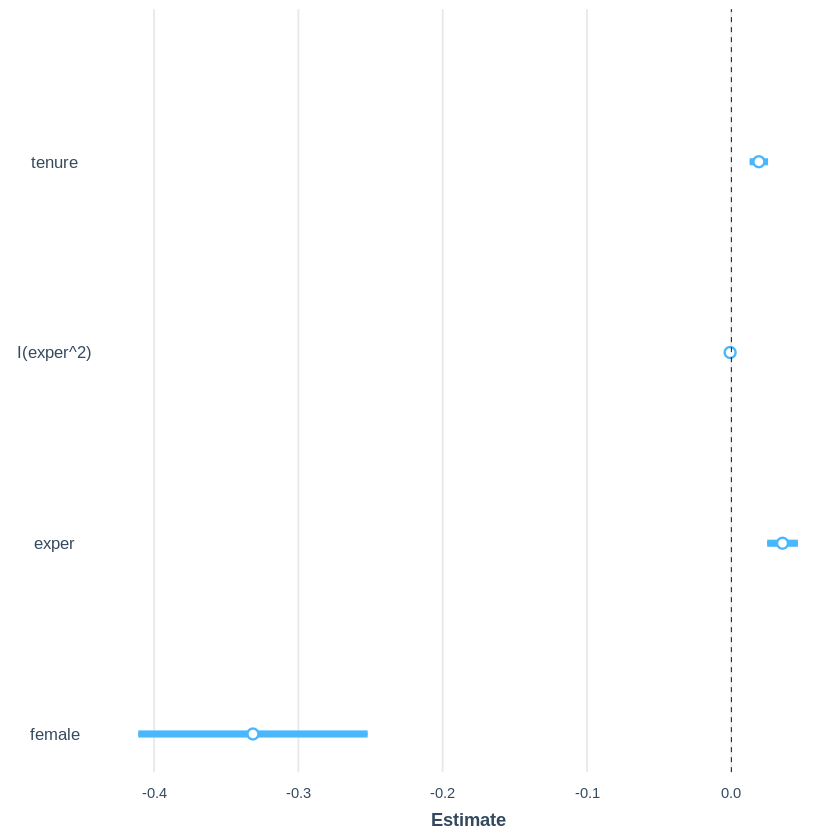

In [16]:
jtools::plot_coefs(hourly_wage_model, scale = TRUE, plot.distributions = TRUE, inner_ci_level = .95)

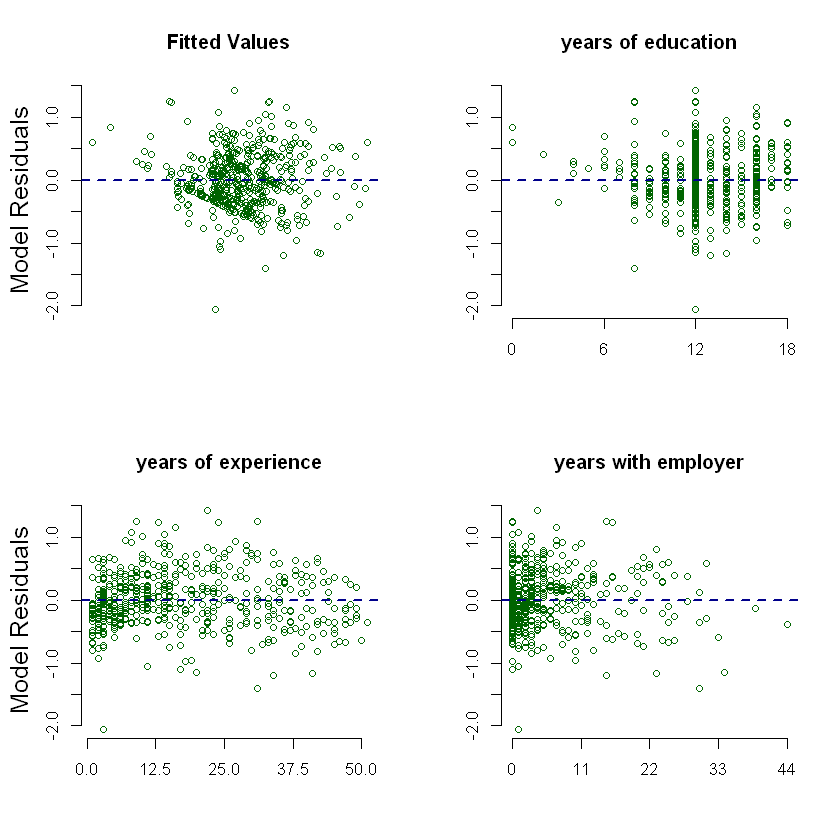

In [9]:
par(mfrow=c(2,2))

plot(y = hourly_wage_model$residuals, x = hourly_wage_model$fitted.values , col="darkgreen", xaxt="n", 
     frame = FALSE, main = "Fitted Values", xlab = "", ylab = "")
mtext(side=2, line=2.5, "Model Residuals", cex=1.25)
abline(0, 0, col = "darkblue", lty=2, lwd=2)

plot(y = hourly_wage_model$residuals, x = wage1$educ, col="darkgreen", xaxt="n", 
     frame = FALSE, main = "years of education", xlab = "", ylab = "")
axis(side = 1, at = c(0,6,12,18))
abline(0, 0, col = "darkblue", lty=2, lwd=2)

plot(y = hourly_wage_model$residuals, x = wage1$exper, col="darkgreen", xaxt="n", 
     frame = FALSE, main = "years of experience", xlab = "", ylab = "")
mtext(side=2, line=2.5, "Model Residuals", cex=1.25)
axis(side = 1, at = c(0,12.5,25,37.5,50))
abline(0, 0, col = "darkblue", lty=2, lwd=2)

plot(y = hourly_wage_model$residuals, x = wage1$tenure, col="darkgreen", xaxt="n", 
     frame = FALSE, main = "years with employer", xlab = "", ylab = "")
axis(side = 1, at = c(0,11,22,33,44))
abline(0, 0, col = "darkblue", lty=2, lwd=2)

# Example 4.7 Effect of Job Training on Firm Scrap Rates

In [6]:
data("jtrain")
?jtrain

In [8]:
jtrain_subset <- subset(jtrain, subset = (year == 1987 & union == 0),
                          select = c(year, union, lscrap, hrsemp, lsales, lemploy))

In [9]:
sum(is.na(jtrain_subset))

[1] 156

In [10]:
jtrain_clean <- na.omit(jtrain_subset)

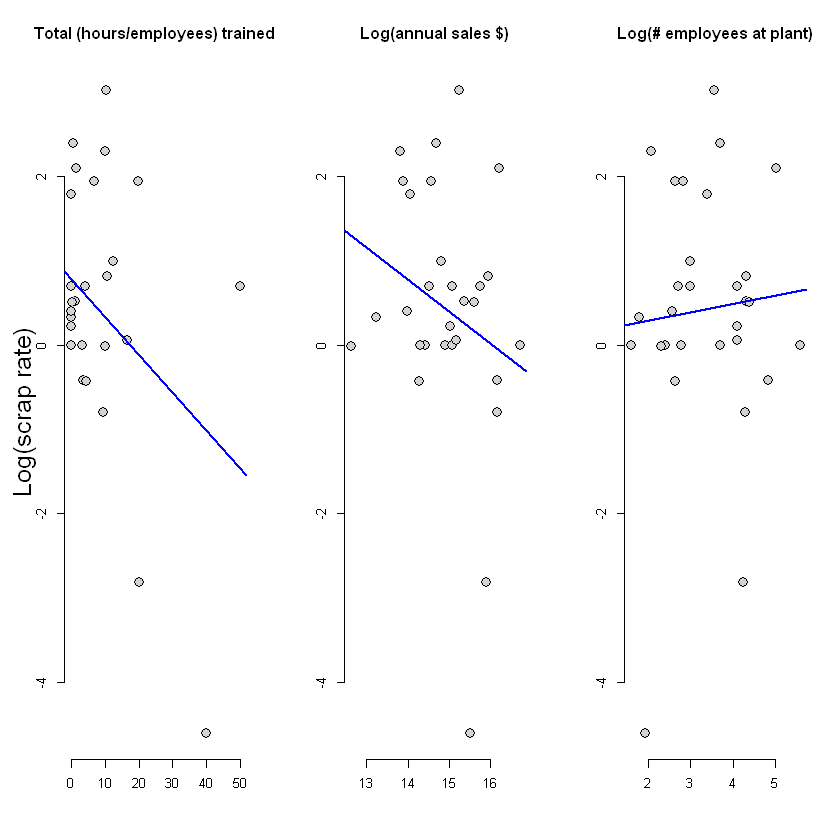

In [14]:
par(mfrow=c(1,3))

point_size <- 1.75

plot(y = jtrain_clean$lscrap, x = jtrain_clean$hrsemp, frame = FALSE, 
main = "Total (hours/employees) trained", ylab = "", xlab="", pch = 21, bg = "lightgrey", cex=point_size)
mtext(side=2, line=2, "Log(scrap rate)", cex=1.25)
abline(lm(lscrap ~ hrsemp, data=jtrain_clean), col = "blue", lwd=2)

plot(y = jtrain_clean$lscrap, x = jtrain_clean$lsales, frame = FALSE, main = "Log(annual sales $)", ylab = " ", xlab="", pch = 21, bg = "lightgrey", cex=point_size)
abline(lm(lscrap ~ lsales, data=jtrain_clean), col = "blue", lwd=2)

plot(y = jtrain_clean$lscrap, x = jtrain_clean$lemploy, frame = FALSE, main = "Log(# employees at plant)", ylab = " ", xlab="", pch = 21, bg = "lightgrey", cex=point_size)
abline(lm(lscrap ~ lemploy, data=jtrain_clean), col = "blue", lwd=2)

Now create the linear model regressing hrsemp(total hours training/total employees trained), the lsales(log of annual sales), and lemploy(the log of the number of the employees), against lscrap(the log of the scrape rate).

$$lscrap = \alpha + \beta_1 hrsemp + \beta_2 lsales + \beta_3 lemploy$$

In [11]:
linear_model <- lm(lscrap ~ hrsemp + lsales + lemploy, data = jtrain_clean)

In [12]:
summary(linear_model)
stargazer(type = "text", linear_model, single.row = TRUE, header = FALSE, digits=5)


Call:
lm(formula = lscrap ~ hrsemp + lsales + lemploy, data = jtrain_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6301 -0.7523 -0.4016  0.8697  2.8273 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 12.45837    5.68677   2.191   0.0380 *
hrsemp      -0.02927    0.02280  -1.283   0.2111  
lsales      -0.96203    0.45252  -2.126   0.0436 *
lemploy      0.76147    0.40743   1.869   0.0734 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.376 on 25 degrees of freedom
Multiple R-squared:  0.2624,	Adjusted R-squared:  0.1739 
F-statistic: 2.965 on 3 and 25 DF,  p-value: 0.05134



                        Dependent variable:    
                    ---------------------------
                              lscrap           
-----------------------------------------------
hrsemp                  -0.02927 (0.02280)     
lsales                 -0.96203** (0.45252)    
lemploy                 0.76147* (0.40743)     
Constant               12.45837** (5.68677)    
-----------------------------------------------
Observations                    29             
R2                            0.26243          
Adjusted R2                   0.17392          
Residual Std. Error      1.37604 (df = 25)     
F Statistic            2.96504* (df = 3; 25)   
Note:               *p<0.1; **p<0.05; ***p<0.01


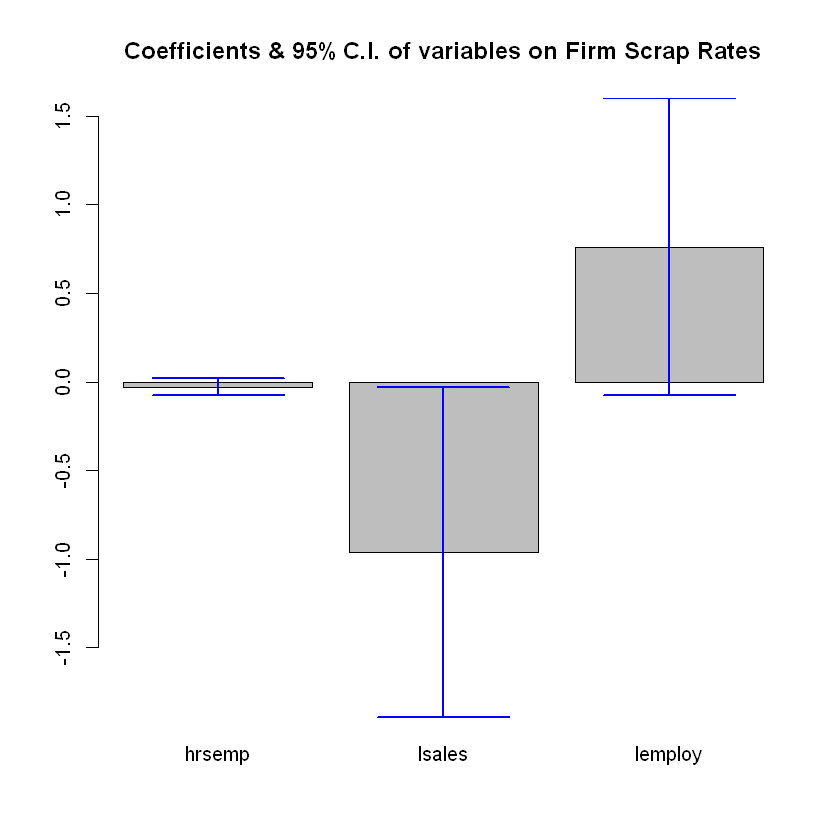

In [17]:
#Plot the coefficients, representing the impact of each variable on $log($`scrap`$)$ for a quick comparison. As you can observe, for some variables, the confidence intervals are wider than others.
coefficient <- coef(linear_model)[-1]
 confidence <- confint(linear_model, level = 0.95)[-1,]

graph <- drop(barplot(coefficient, ylim = range(c(confidence)),
              main = "Coefficients & 95% C.I. of variables on Firm Scrap Rates"))  

arrows(graph, coefficient, graph, confidence[,1], angle=90, length=0.55, col="blue", lwd=2)
arrows(graph, coefficient, graph, confidence[,2], angle=90, length=0.55, col="blue", lwd=2)

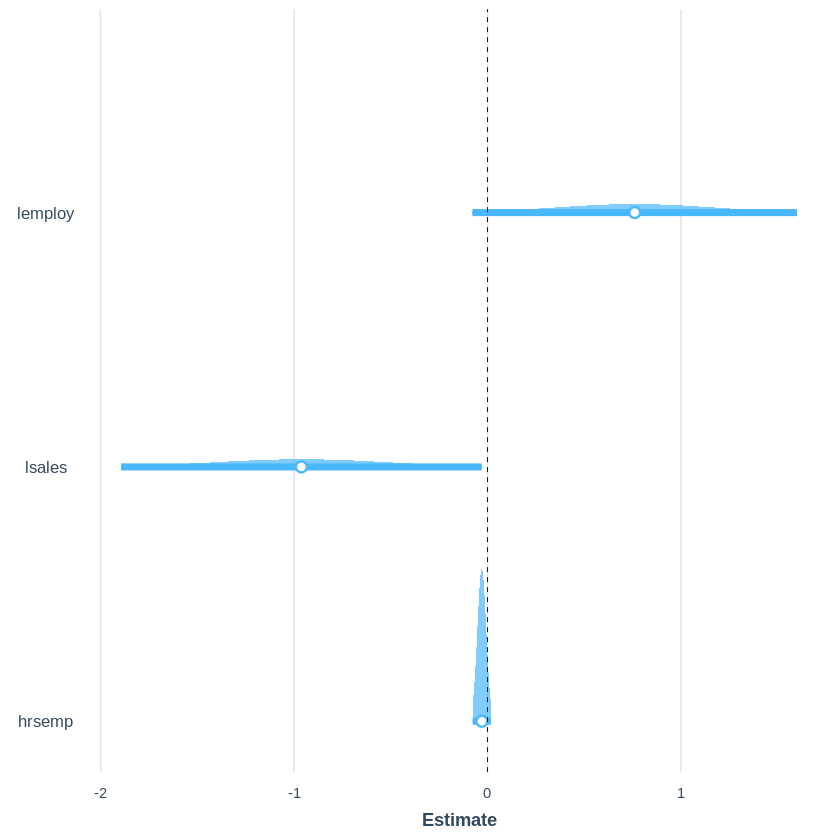

In [13]:
jtools::plot_coefs(linear_model, scale = TRUE, plot.distributions = TRUE, inner_ci_level = .95)

In [19]:
fit <- lm(mpg ~ hp + wt, data = mtcars)
fit_b <- lm(mpg ~ hp + wt + disp, data = mtcars)
fit_c <- lm(mpg ~ hp + wt + disp + drat, data = mtcars)
coef_names <- c("Horsepower" = "hp", "Weight (tons)" = "wt",
                "Displacement" = "disp", "Rear axle ratio" = "drat",
                "Constant" = "(Intercept)")
jtools::export_summs(fit, fit_b, fit_c, scale = TRUE, transform.response = TRUE, coefs = coef_names)

ERROR: Error: Install the huxtable package to use the export_summs function.
